In [205]:
pip install mlflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [206]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import mlflow
import mlflow.sklearn
from sklearn.preprocessing import LabelEncoder

In [207]:
df = pd.read_csv(r'C:\Users\jothi\Desktop\GUVI PROJECT_3\medical_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [208]:
df.shape

(2772, 7)

In [209]:
df.drop_duplicates(inplace=True)

In [210]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [211]:
df.dropna(inplace=True)
print("Shape after cleaning:", df.shape)

Shape after cleaning: (1337, 7)


In [212]:
categorical_cols = ['sex', 'smoker']

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [213]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['smoker'] = le.fit_transform(df['smoker'])

In [214]:
df = pd.get_dummies(df, columns=['region'], drop_first=True)

In [215]:
def get_region(row):
    if row['region_northwest'] == 1:
        return 'Northwest'
    elif row['region_southeast'] == 1:
        return 'Southeast'
    else:
        return 'Northeast'

df['region_label'] = df.apply(get_region, axis=1)

In [216]:
# BMI Category: Normal (<25), Overweight (25–30), Obese (>30)
def classify_bmi(bmi):
    if bmi < 25:
        return 'normal'
    elif 25 <= bmi < 30:
        return 'overweight'
    else:
        return 'obese'

df['bmi_category'] = df['bmi'].apply(classify_bmi)
df['bmi_category_encoded'] = le.fit_transform(df['bmi_category'])
df.drop(columns=['bmi_category'], inplace=True)


In [217]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['charges'] >= Q1 - 1.5 * IQR) & (df['charges'] <= Q3 + 1.5 * IQR)]

In [218]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['age', 'bmi', 'children']] = scaler.fit_transform(df[['age', 'bmi', 'children']])


In [219]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['age', 'bmi', 'children']] = scaler.fit_transform(df[['age', 'bmi', 'children']])

In [220]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,region_label,bmi_category_encoded
0,0.021739,0,0.321227,0.0,1,16884.92400,False,False,True,Northeast,2
1,0.000000,1,0.479150,0.2,0,1725.55230,False,True,False,Southeast,1
2,0.217391,1,0.458434,0.6,0,4449.46200,False,True,False,Southeast,1
3,0.326087,1,0.181464,0.0,0,21984.47061,True,False,False,Northwest,0
4,0.304348,1,0.347592,0.0,0,3866.85520,True,False,False,Northwest,2


In [221]:
df.tail()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,region_label,bmi_category_encoded
1333,0.695652,1,0.403820,0.6,0,10600.5483,True,False,False,Northwest,1
1334,0.000000,0,0.429379,0.0,0,2205.9808,False,False,False,Northeast,1
1335,0.000000,0,0.562012,0.0,0,1629.8335,False,True,False,Southeast,1
1336,0.065217,0,0.264730,0.0,0,2007.9450,False,False,True,Northeast,2
1337,0.934783,0,0.352704,0.0,1,29141.3603,True,False,False,Northwest,2


In [222]:
processed_file = 'clean_insurance_data.csv'
df.to_csv(processed_file, index=False)
print(f" Preprocessing complete. File saved as: {processed_file}")

 Preprocessing complete. File saved as: clean_insurance_data.csv


Exploratory Data Analysis (EDA)

In [223]:
df = pd.read_csv(r'C:\Users\jothi\Desktop\GUVI PROJECT_3\clean_insurance_data.csv')


In [145]:
sns.set(style='whitegrid')

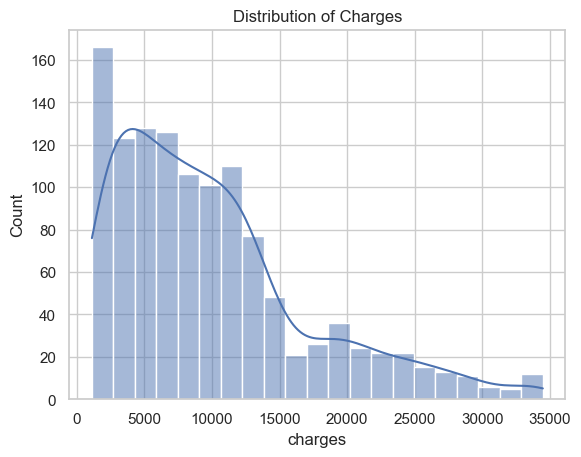

In [224]:
#Univariate Analysis
# ●	What is the distribution of medical insurance charges?


sns.histplot(df['charges'], kde=True)
plt.title("Distribution of Charges")
plt.show()

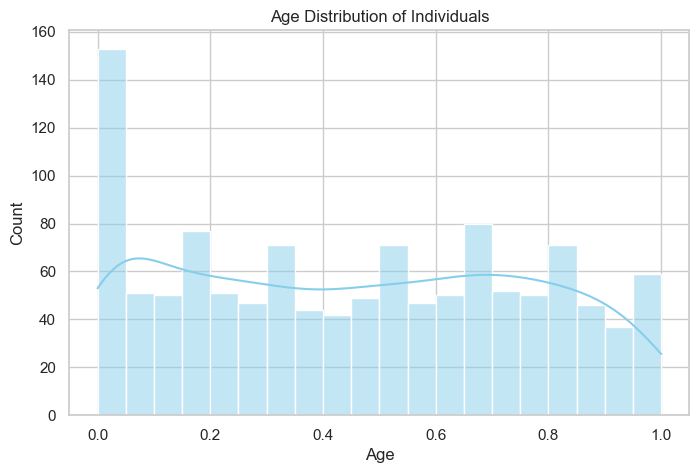

In [225]:
# ●	What is the age distribution of the individuals?

plt.figure(figsize=(8, 5))
sns.histplot(df['age'], kde=True, bins=20, color='skyblue')
plt.title("Age Distribution of Individuals")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

C:\Users\jothi\AppData\Local\Temp\ipykernel_18152\740282920.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker', data=df, palette='pastel')


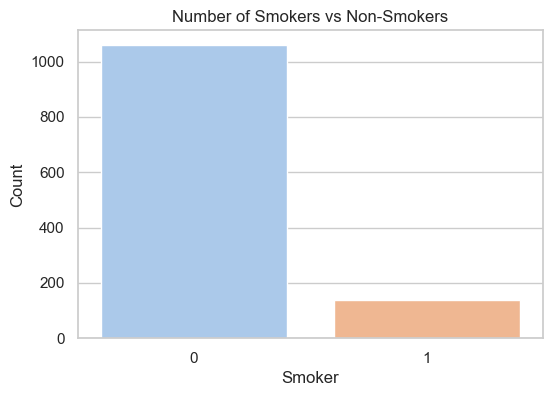

In [226]:
# ●	How many people are smokers vs non-smokers?

plt.figure(figsize=(6, 4))
sns.countplot(x='smoker', data=df, palette='pastel')
plt.title("Number of Smokers vs Non-Smokers")
plt.xlabel("Smoker")
plt.ylabel("Count")
plt.show()

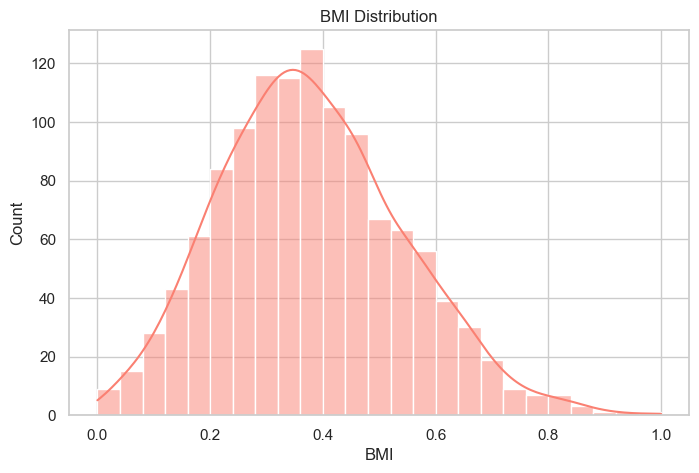

In [227]:
# ●	What is the average BMI in the dataset?

plt.figure(figsize=(8, 5))
sns.histplot(df['bmi'], kde=True, color='salmon')
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

In [228]:
df.columns = df.columns.str.strip()

In [154]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,region_label,bmi_category_encoded
0,0.021739,0,0.321227,0.0,1,16884.92400,False,False,True,Northeast,2
1,0.000000,1,0.479150,0.2,0,1725.55230,False,True,False,Southeast,1
2,0.217391,1,0.458434,0.6,0,4449.46200,False,True,False,Southeast,1
3,0.326087,1,0.181464,0.0,0,21984.47061,True,False,False,Northwest,0
4,0.304348,1,0.347592,0.0,0,3866.85520,True,False,False,Northwest,2


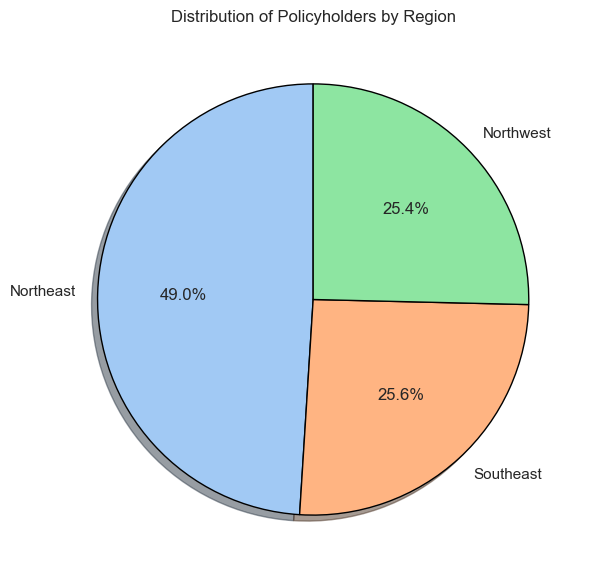

In [229]:
#●	Which regions have the most number of policyholders?

plt.figure(figsize=(7, 7))
df['region_label'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel"),
    shadow=True,
    wedgeprops={'linewidth': 1, 'edgecolor': 'black'}
)
plt.title("Distribution of Policyholders by Region")
plt.ylabel("")  # Hide y-label for cleaner look
plt.show()



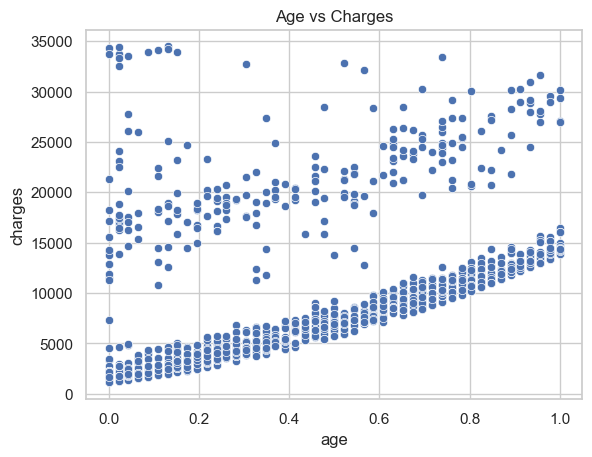

In [230]:
# Bivariate Analysis
#●	How do charges vary with age?

sns.scatterplot(x='age', y='charges', data=df)
plt.title("Age vs Charges")
plt.show()


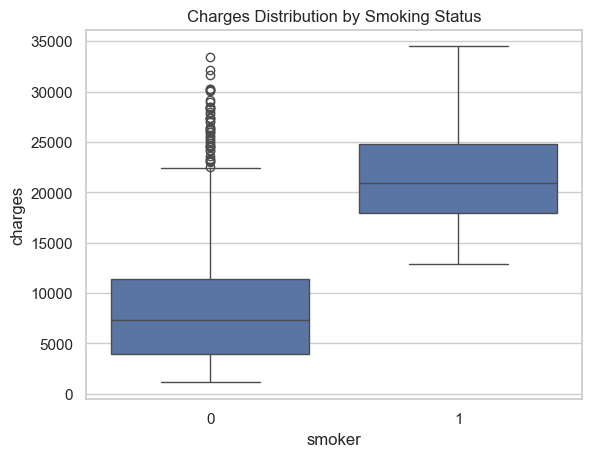

In [231]:
# ●	Is there a difference in average charges between smokers and non-smokers?

sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges Distribution by Smoking Status')
plt.show()

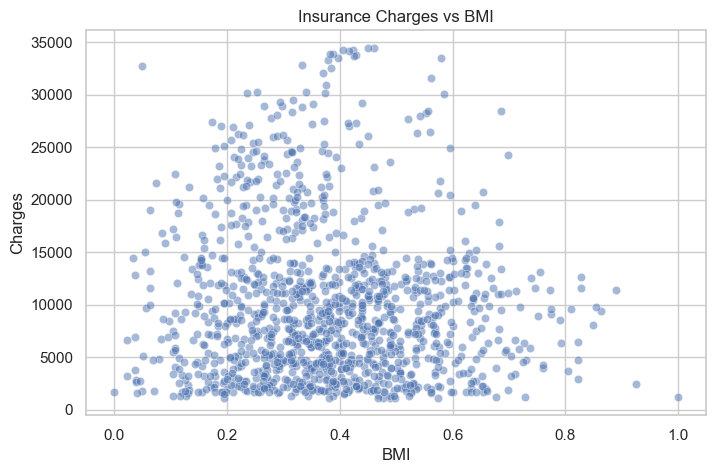

In [232]:
# ●	Does BMI impact insurance charges?

plt.figure(figsize=(8,5))
sns.scatterplot(x='bmi', y='charges', data=df, alpha=0.5)
plt.title('Insurance Charges vs BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

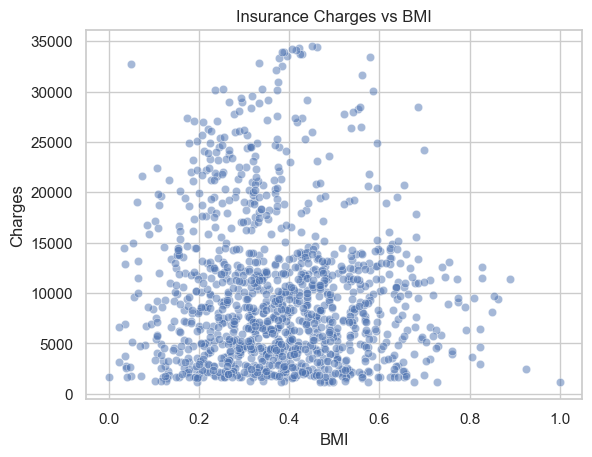

In [233]:
# ●	Does BMI impact insurance charges?

sns.scatterplot(x='bmi', y='charges', data=df, alpha=0.5)
plt.title('Insurance Charges vs BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

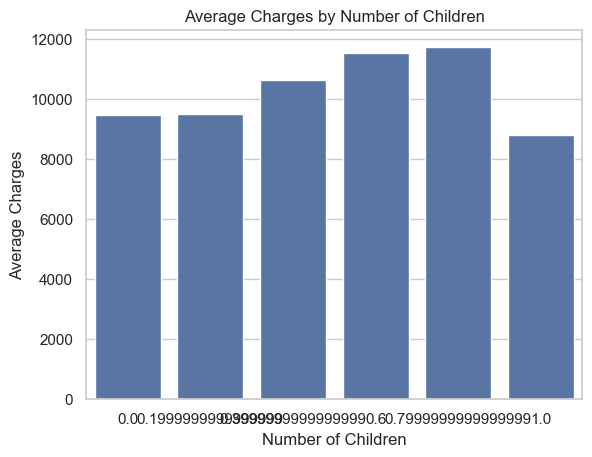

In [234]:
# ●	Is there a correlation between the number of children and the insurance charges?


avg_charges_by_children = df.groupby('children')['charges'].mean().reset_index()
sns.barplot(x='children', y='charges', data=avg_charges_by_children)
plt.title('Average Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Average Charges')
plt.show()

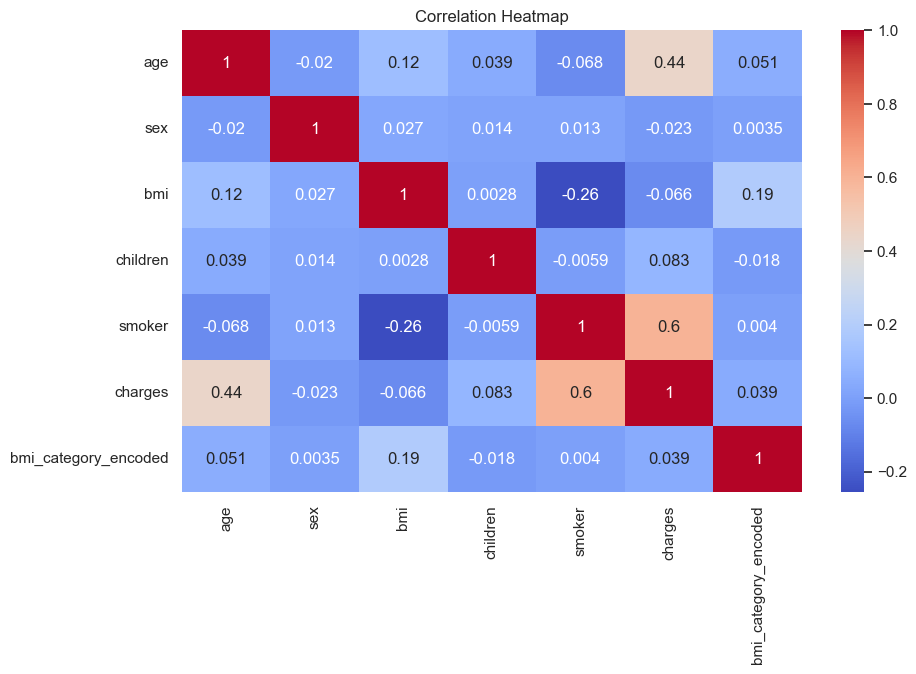

In [235]:
# Correlation Heatmap

# ●	Which features have the strongest correlation with the target variable (charges)?

df = df.select_dtypes(include='number')

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


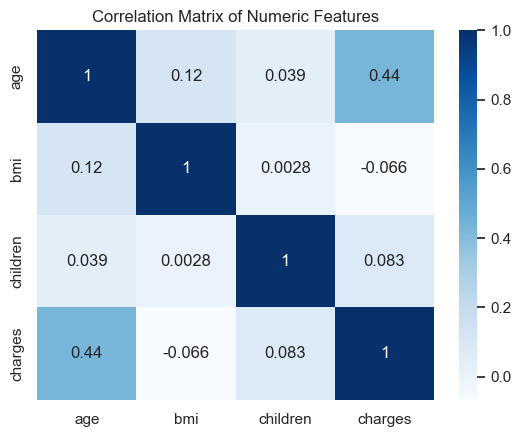

In [236]:
#●	What is the correlation between numeric features like age, BMI, number of children, and charges?


numeric_features = ['age', 'bmi', 'children', 'charges']
correlation_matrix = df[numeric_features].corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

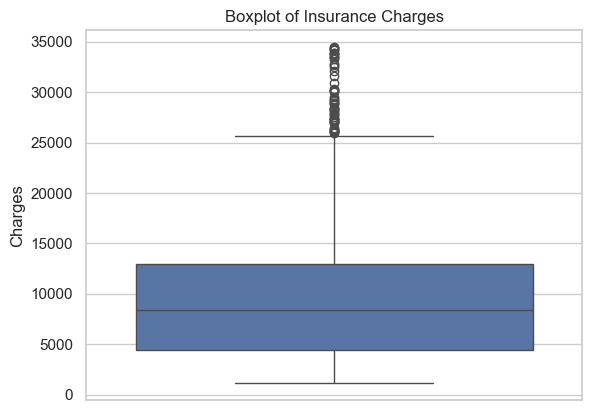

In [237]:
# 4. Outlier Detection
#●	Are there outliers in the charges column? Who are the individuals paying the highest costs?

sns.boxplot(y='charges', data=df)
plt.title('Boxplot of Insurance Charges')
plt.ylabel('Charges')
plt.show()

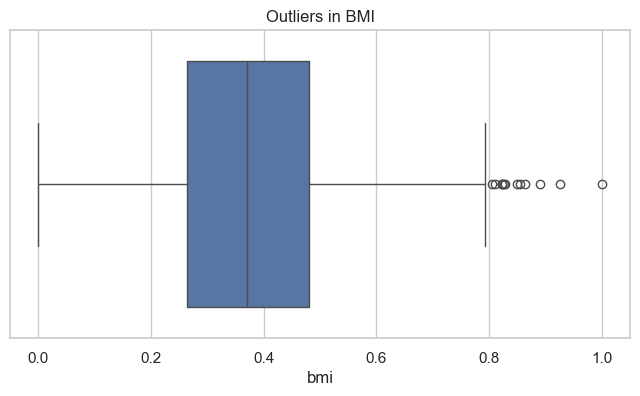

In [238]:
# ●	Are there extreme BMI values that could skew predictions?
# BMI
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['bmi'])
plt.title("Outliers in BMI")
plt.show()


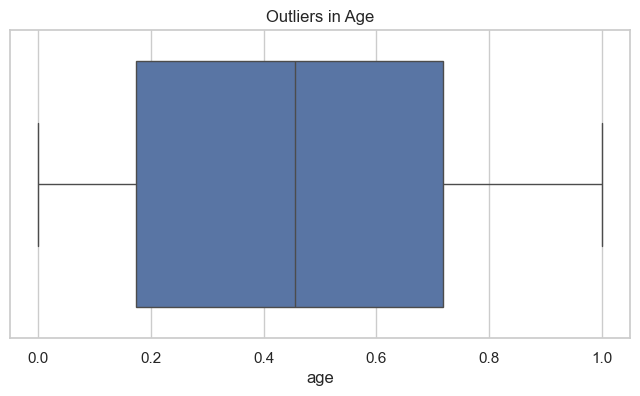

In [239]:

# Age 
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['age'])
plt.title("Outliers in Age")
plt.show()

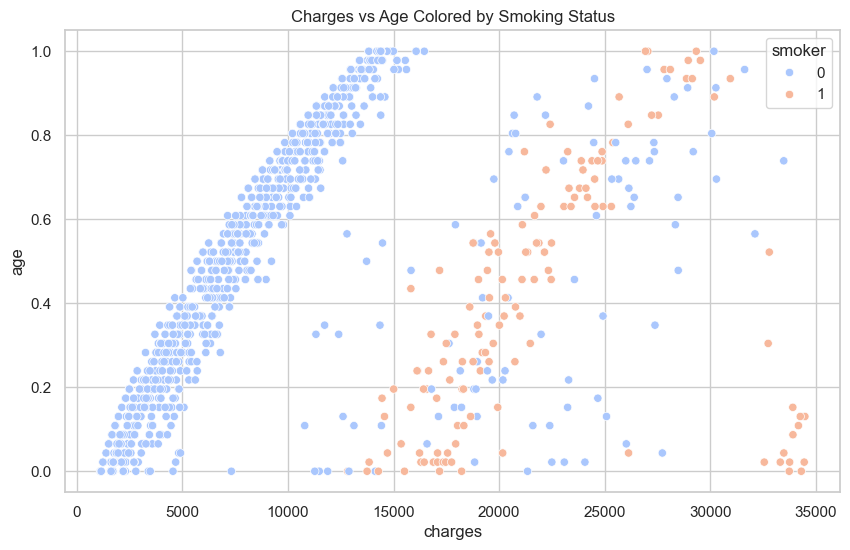

In [240]:
# 5. Multivariate Analysis 
# 1.●	How does smoking status combined with age affect medical charges?
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='charges', y='age', hue='smoker', palette='coolwarm')
plt.title("Charges vs Age Colored by Smoking Status")
plt.show()

In [108]:
df.head()

,age,sex,bmi,children,smoker,charges
0,0.021739,0,0.321227,0.0,1,16884.92400
1,0.000000,1,0.479150,0.2,0,1725.55230
2,0.217391,1,0.458434,0.6,0,4449.46200
3,0.326087,1,0.181464,0.0,0,21984.47061
4,0.304348,1,0.347592,0.0,0,3866.85520


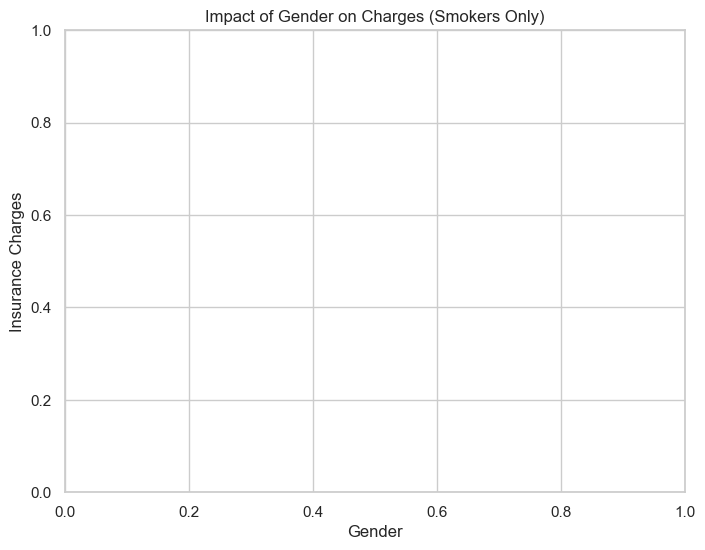

In [241]:
# 2.What is the impact of gender and region on charges for smokers?

df.columns = df.columns.str.strip().str.lower()

# Filter only smokers
smokers_df = df[df['smoker'] == 'yes']

# Gender vs Charges
plt.figure(figsize=(8, 6))
sns.boxplot(data=smokers_df, x='sex', y='charges', palette='Set2')
plt.title("Impact of Gender on Charges (Smokers Only)")
plt.xlabel("Gender")
plt.ylabel("Insurance Charges")
plt.grid(True)
plt.show()



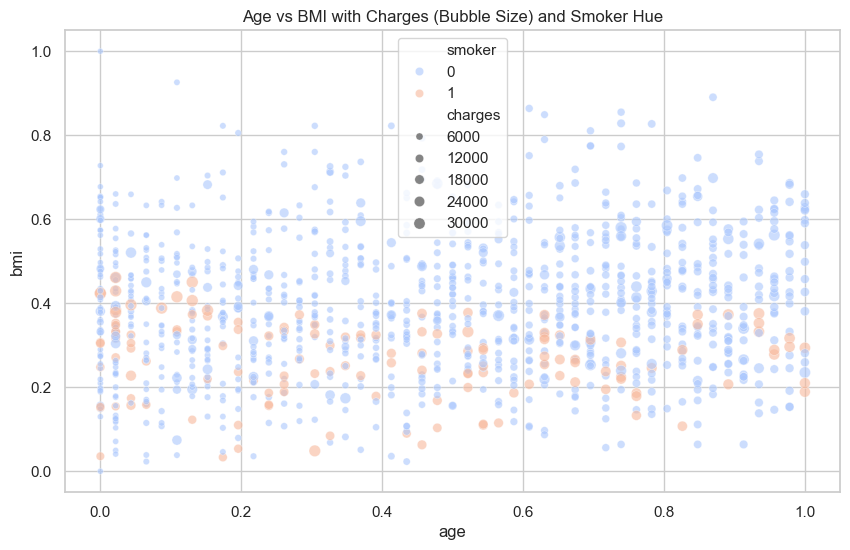

In [242]:
#3.How do age, BMI, and smoking status together affect insurance cost?

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='bmi', size='charges', hue='smoker', palette='coolwarm', alpha=0.6)
plt.title("Age vs BMI with Charges (Bubble Size) and Smoker Hue")
plt.legend()
plt.show()



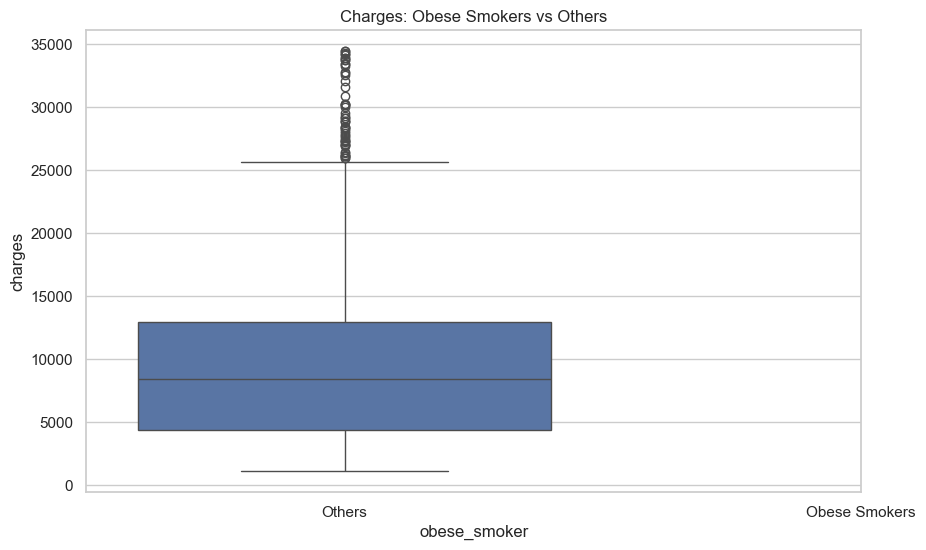

In [243]:
#4.Do obese smokers (BMI > 30) pay significantly higher than non-obese non-smokers?

df['obese_smoker'] = ((df['bmi'] > 30) & (df['smoker'] == 'yes')).astype(int)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='obese_smoker', y='charges')
plt.title("Charges: Obese Smokers vs Others")
plt.xticks([0, 1], ['Others', 'Obese Smokers'])
plt.show()

Train_model in ml flow

In [244]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [256]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np # Import numpy

In [257]:
df = pd.read_csv(r'C:\Users\jothi\Desktop\GUVI PROJECT_3\clean_insurance_data.csv')

In [258]:
X = df.drop(columns=['charges'])
y = df['charges']


In [259]:
def log_model(model, name, X_train, X_test, y_train, y_test):
    with mlflow.start_run(run_name=name):
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        r2 = r2_score(y_test, preds)
        mae = mean_absolute_error(y_test, preds)
        rmse = np.sqrt(mean_squared_error(y_test, preds))

        mlflow.log_param("model", name)
        mlflow.log_metric("r2_score", r2)
        mlflow.log_metric("mae", mae)
        mlflow.log_metric("rmse", rmse)

        mlflow.sklearn.log_model(model, name + "_model")

        print(f"{name} - R²: {r2:.4f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}")
    mlflow.set_experiment("Insurance Model Comparison")

In [262]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv(r"C:\Users\jothi\Desktop\GUVI PROJECT_3\new_insurance_data.csv")
df.columns = df.columns.str.strip().str.lower()

# Features & target
X = df.drop('charges', axis=1)
y = df['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify columns
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# Preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

# Enable MLflow experiment
mlflow.set_experiment("Insurance cost Model Experiment")

# Train & track models with MLflow
for name, model in models.items():
    with mlflow.start_run(run_name=name):
        # Full pipeline
        pipeline = Pipeline([
            ('preprocess', preprocessor),
            ('model', model)
        ])
        
        pipeline.fit(X_train, y_train)
        preds = pipeline.predict(X_test)

        # Metrics
        rmse = mean_squared_error(y_test, preds)
        mse = mean_squared_error(y_test, preds)
        r2 = r2_score(y_test, preds)

        # Log parameters and metrics
        mlflow.log_param("model", name)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("mse", mse)
        mlflow.log_metric("r2_score", r2)

        # Log model
        mlflow.sklearn.log_model(pipeline, name.replace(" ", "_") + "_model")
        print(f"{name}: RMSE: {rmse:.2f}, MSE={mse:.2f}, R2={r2:.2f}")

2025/06/15 22:34:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Linear Regression: RMSE: 39933194.55, MSE=39933194.55, R2=0.74


2025/06/15 22:34:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Decision Tree: RMSE: 7800833.74, MSE=7800833.74, R2=0.95


2025/06/15 22:34:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest: RMSE: 7598681.09, MSE=7598681.09, R2=0.95


2025/06/15 22:34:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


XGBoost: RMSE: 7021910.25, MSE=7021910.25, R2=0.95


In [263]:
with mlflow.start_run(run_name="Polynomial Regression"):
    polynomial_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('model', LinearRegression())
    ])
    polynomial_pipeline.fit(X_train, y_train)
    preds = polynomial_pipeline.predict(X_test)

    rmse = mean_squared_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    mlflow.log_param("model", "Polynomial Regression")
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("R2_Score", r2)
    mlflow.sklearn.log_model(polynomial_pipeline, "Polynomial_Regression_Model")
    print(f"Polynomial Regression | MSE: {mse:.2f},RMSE: {rmse:.2f}, R²: {r2:.2f}")

2025/06/15 22:35:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Polynomial Regression | MSE: 25159863.44,RMSE: 25159863.44, R²: 0.84
